# Tensorflow CNNs

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf

np.set_printoptions(suppress=True)

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
# assert X_train.shape == (60000, 28, 28)
# assert X_test.shape == (10000, 28, 28)
# assert y_train.shape == (60000,)
# assert y_test.shape == (10000,)

In [9]:
from tensorflow.keras.layers import Dense, Softmax, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras import Model

# Use tf.data to batch and shuffle the dataset:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

In [15]:
model = tf.keras.models.Sequential([
    Conv2D(filters=6, kernel_size=[5, 5], strides=1, padding='valid', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=2, strides=2, padding='valid'),
    Conv2D(filters=16, kernel_size=[5, 5], strides=1, padding='valid'),
    MaxPooling2D(pool_size=2, strides=2, padding='valid'),
    Flatten(),
    Dense(120, activation='relu', input_shape=(784,)),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

model_history = model.fit(
    train_ds,
    epochs=6,
    validation_data=test_ds,
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_10 (Dense)             (None, 84)               

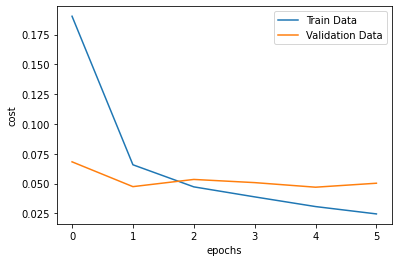

In [17]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label="Train Data")
plt.plot(model_history.history['val_loss'], label="Validation Data")
plt.ylabel('cost')
plt.xlabel('epochs')
plt.legend()
plt.show()

prediction: 9


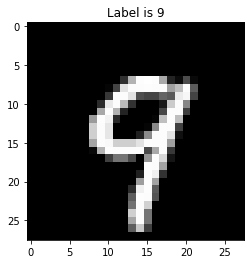

In [29]:
index = 12

image = X_test[index]

haty = model.predict(image.reshape(1, 28, 28, 1))

print('prediction: {label}'.format(label = np.argmax(haty)))

plt.title('Label is {label}'.format(label=y_test[index]))
plt.imshow(image.reshape((28, 28)), cmap='gray')
plt.show()

In [40]:
read_test_data = pd.read_csv('test.csv')

In [55]:
test_data_original = read_test_data / 255
test_data = []
# test_data.shape

for i in test_data_original.index:
    test_data.append(test_data_original.iloc[i].values.reshape(28, 28, 1))
test_data = np.array(test_data)
# test_data.shape
# test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)

In [59]:
hatys = model.predict(test_data)
hatys = np.array([np.argmax(y) for y in hatys])

In [61]:
hatys = pd.DataFrame(zip(range(1, len(hatys) + 1), hatys), columns=['ImageId', 'Label'])
hatys.to_csv('submission.csv', index=False)